In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../outputs/exp_summary1.csv")
df2 = pd.read_csv("../outputs/exp_summary2.csv")

# milliseconds to seconds
df["runtime_igraph"] = df["runtime_igraph"] / 1000
df["runtime_ours"] = df["runtime_ours"] / 1000
df2["runtime_ours"] = df2["runtime_ours"] / 1000

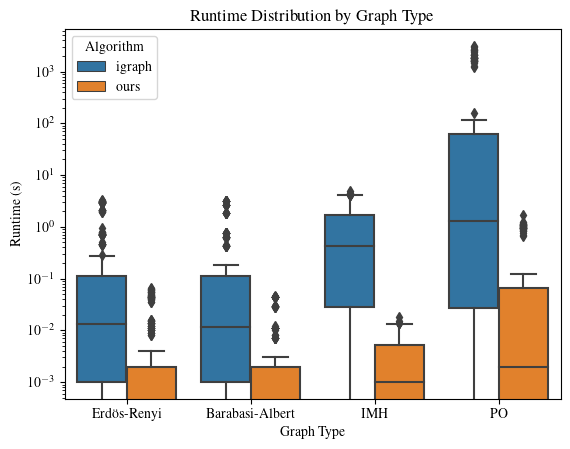

In [12]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],    # or ["Palatino"], ["Computer Modern Roman"], etc.
})

ax = sns.boxplot(data=df.melt(id_vars=["type"], value_vars=["runtime_igraph", "runtime_ours"],
                         var_name="algorithm", value_name="runtime"),
            x="type", y="runtime", hue="algorithm",
            order=["erdos-renyi", "barabasi-albert", "IMH", "perfectOperations"])

ax.legend(title="Algorithm")
legend_labels = ["igraph", "ours"]
for t, l in zip(ax.legend_.texts, legend_labels):
    t.set_text(l)

plt.xlabel("Graph Type")
ax.set_xticklabels(["Erdös-Renyi", "Barabasi-Albert", "IMH", "PO"])
plt.ylabel("Runtime (s)")
plt.yscale("log")
plt.title("Runtime Distribution by Graph Type")
plt.savefig("fig.png", dpi=288)
plt.show()

In [5]:
print(len(df))
print(len(df2))

1050
120


In [5]:
df_merged = pd.concat([df, df2], axis=0)

In [6]:
table = pd.pivot_table(
    df_merged,
    index=["order", "density"],  # multi-level rows
    values=["runtime_igraph", "runtime_ours"],  # runtime metrics
    columns="type",  # graph type as outer columns
    aggfunc="mean"   # or "median", "min", "max" depending on what you want
)

table = table.sort_index(axis=1, level=0)
table.columns = table.columns.swaplevel(0, 1)
table = table[[
    (      'erdos-renyi', 'runtime_igraph'),
    (      'erdos-renyi',   'runtime_ours'),
    (  'barabasi-albert', 'runtime_igraph'),
    (  'barabasi-albert',   'runtime_ours'),
    (              'IMH', 'runtime_igraph'),
    (              'IMH',   'runtime_ours'),
    ('perfectOperations', 'runtime_igraph'),
    ('perfectOperations',   'runtime_ours')
]]

table = table.rename(
    columns={"runtime_igraph": "igraph", "runtime_ours": "ours"},
    level=1
)
table = table.rename(
    columns={
        "erdos-renyi": "ER",
        "barabasi-albert": "BA",
        "IMH": "IMH",
        "perfectOperations": "PO"
    },
    level=0
)



In [7]:
print(table)


type               ER              BA             IMH                 PO  \
               igraph    ours  igraph    ours  igraph    ours     igraph   
order density                                                              
10    25000    0.0001  0.0000  0.0000  0.0000  0.0001  0.0000     0.0000   
      50000    0.0002  0.0000  0.0006  0.0000  0.0008  0.0000     0.0005   
      75000    0.0001  0.0000  0.0000  0.0000  0.0003  0.0000     0.0000   
25    25000    0.0000  0.0000  0.0000  0.0000  0.0477  0.0000     0.0246   
      50000    0.0000  0.0000  0.0004  0.0000  0.0610  0.0000     0.0249   
      75000    0.0000  0.0000  0.0000  0.0000  0.0523  0.0000     0.0232   
50    25000    0.0000  0.0000  0.0000  0.0000  0.8706  0.0022     0.2823   
      50000    0.0000  0.0000  0.0000  0.0000  0.8775  0.0031     0.2828   
      75000    0.0000  0.0000  0.0000  0.0000  0.8753  0.0022     0.2711   
75    25000    0.0010  0.0000  0.0010  0.0000  4.0924  0.0119     1.3297   
      50000 

In [8]:
# For README.md
# small adjustments are made on the format

# table.to_html("table.html")
# print(table.to_html())
